In [4]:
%pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import streamlit as st
# Load the Excel file into a DataFrame
df = pd.read_excel('./assests/datadump.xlsx')


In [3]:
# Step 4: Extract 'powerConsumed' values from 'Init Data' column
def extract_power_consumed(init_data):
    try:
        init_data_dict = json.loads(init_data)
        return init_data_dict.get('powerConsumed', np.nan)
    except json.JSONDecodeError:
        return np.nan
def extract_onOff(init_data):
    try:
        init_data_dict = json.loads(init_data)
        return init_data_dict.get('onOff', np.nan)
    except json.JSONDecodeError:
        return np.nan
def extract_humidity(init_data):
    try:
        init_data_dict = json.loads(init_data)
        return init_data_dict.get('humidity', np.nan)
    except json.JSONDecodeError:
        return np.nan
def extract_temperature(init_data):
    try:
        init_data_dict = json.loads(init_data)
        return init_data_dict.get('temperature', np.nan)
    except json.JSONDecodeError:
        return np.nan
def extract_brightness(init_data):
    try:
        init_data_dict = json.loads(init_data)
        return init_data_dict.get('brightness', np.nan)
    except json.JSONDecodeError:
        return np.nan

df['powerConsumed'] = df['Init Data'].apply(extract_power_consumed)
df['onOff'] = df['Init Data'].apply(extract_onOff)
df['humidity'] = df['Init Data'].apply(extract_humidity)
df['temperature'] = df['Init Data'].apply(extract_temperature)
df['brightness'] = df['Init Data'].apply(extract_brightness)
display(df)

,ModelID,ID (must be unique),Relationship (From),Relationship Name,Init Data,Date,Time,powerConsumed,onOff,humidity,temperature,brightness
0,dtmi:example:Room;1,Room1,NaN,NaN,"{""temperature"": 20, ""occupancy"": false, ""light...",2024-04-02,15:21:32,0.564509,NaN,34.0,20.0,NaN
1,dtmi:example:AC;1,AC1,Room1,containsAC,"{""temperature"": 21, ""mode"": ""Cool"", ""fanSpeed""...",2024-04-02,15:21:32,0.224278,False,NaN,21.0,NaN
2,dtmi:example:TV;1,TV1,Room1,containsTV,"{""volume"": 1, ""channel"": ""CNN"", ""onOff"": true,...",2024-04-02,15:21:32,0.411922,True,NaN,NaN,NaN
3,dtmi:example:Fan;1,Fan1,Room1,containsFan,"{""speed"": 5, ""onOff"": false, ""powerConsumed"": ...",2024-04-02,15:21:32,0.585035,False,NaN,NaN,NaN
4,dtmi:example:Geyser;1,Geyser1,Room1,containsG,"{""temperature"": 19, ""mode"": ""Heat"", ""onOff"": f...",2024-04-02,15:21:32,0.610572,False,NaN,19.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
805,dtmi:example:Geyser;1,Geyser1,Room1,containsG,"{""temperature"": 21, ""mode"": ""Heat"", ""onOff"": t...",2024-04-08,11:29:18,0.809418,True,NaN,21.0,NaN
806,dtmi:example:Fridge;1,Fridge1,Room1,containsF,"{""temperature"": 20, ""mode"": ""Normal"", ""onOff"":...",2024-04-08,11:29:18,0.704630,True,NaN,20.0,NaN
807,dtmi:example:LightBulb;1,Bulb1,Room1,containsLB,"{""brightness"": 36, ""color"": ""Blue"", ""onOff"": f...",2024-04-08,11:29:18,0.823067,False,NaN,NaN,36.0
808,dtmi:example:WashingMachine;1,Washer1,Room1,containsWM,"{""status"": ""Running"", ""onOff"": false, ""powerCo...",2024-04-08,11:29:18,0.954746,False,NaN,NaN,NaN


In [43]:
# 1. Total power consumed in Room for t time interval
total_power_room = df['powerConsumed'].sum()
print("Total power consumed in Room:", total_power_room)

Total power consumed in Room: 402.8142559803106


In [37]:
# 2. Total power consumed per device like AC, TV and so on for t time interval
total_power_per_device = df.groupby('ModelID')['powerConsumed'].sum()
print("Total power consumed per device:")
print(total_power_per_device)


Total power consumed per device:
ModelID
dtmi:example:AC;1                39.965821
dtmi:example:Fan;1               41.549457
dtmi:example:Fridge;1            43.755479
dtmi:example:Geyser;1            41.860557
dtmi:example:LightBulb;1         43.204879
dtmi:example:Room;1              40.679772
dtmi:example:TV;1                38.540663
dtmi:example:Thermostat;1        40.923478
dtmi:example:WashingMachine;1    44.602063
Name: powerConsumed, dtype: float64


In [44]:
# 3. Average power consumed in Room for t interval
average_power_room = df['powerConsumed'].mean()
print("Average power consumed in Room:", average_power_room)

Average power consumed in Room: 0.49730155059297604


In [39]:
# 4. Average power consumed per device in t interval
average_power_per_device = df.groupby('ModelID')['powerConsumed'].mean()
print("Average power consumed per device:")
print(average_power_per_device)


Average power consumed per device:
ModelID
dtmi:example:AC;1                0.475784
dtmi:example:Fan;1               0.494636
dtmi:example:Fridge;1            0.520899
dtmi:example:Geyser;1            0.498340
dtmi:example:LightBulb;1         0.514344
dtmi:example:Room;1              0.484283
dtmi:example:TV;1                0.458817
dtmi:example:Thermostat;1        0.487184
dtmi:example:WashingMachine;1    0.530977
Name: powerConsumed, dtype: float64


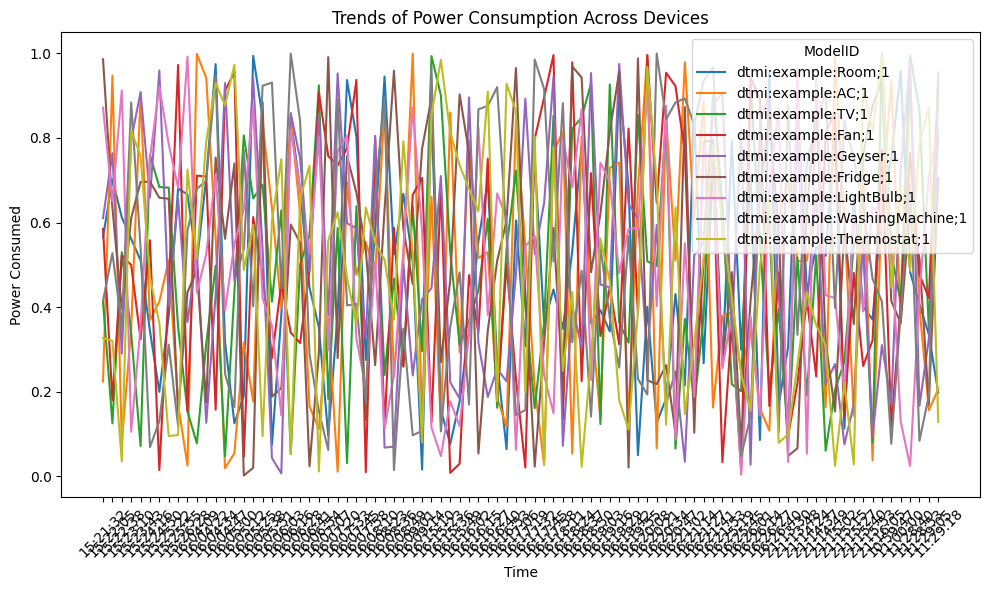

DeltaGenerator()

In [45]:
# 5. Trends and patterns of power consumptions across devices. Create graph for the same
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time', y='powerConsumed', hue='ModelID', data=df)
plt.title('Trends of Power Consumption Across Devices')
plt.xlabel('Time')
plt.ylabel('Power Consumed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
st.pyplot()

<Figure size 640x480 with 0 Axes>

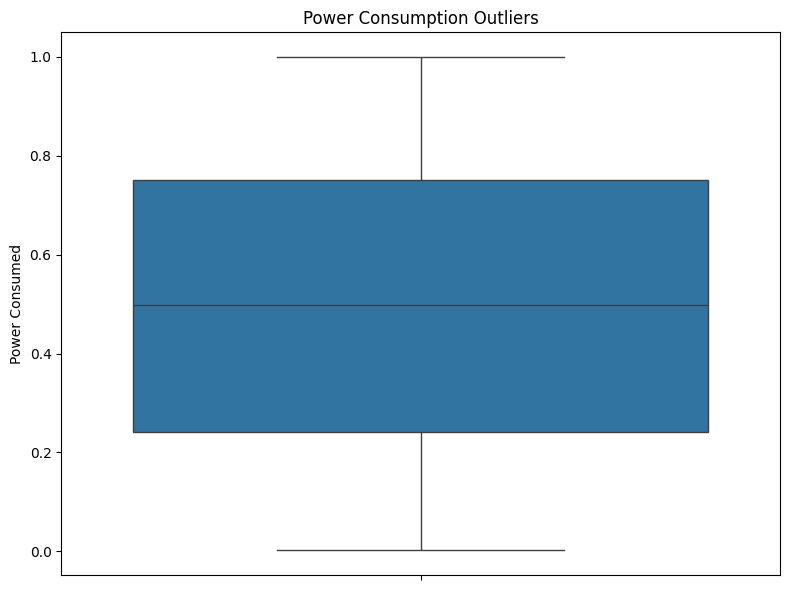

In [46]:
# 6. Power consumed outliers graph
plt.figure(figsize=(8, 6))
sns.boxplot(y='powerConsumed', data=df)
plt.title('Power Consumption Outliers')
plt.ylabel('Power Consumed')
plt.tight_layout()
plt.show()

C:\Users\MAHE\AppData\Local\Temp\ipykernel_17532\3326547705.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


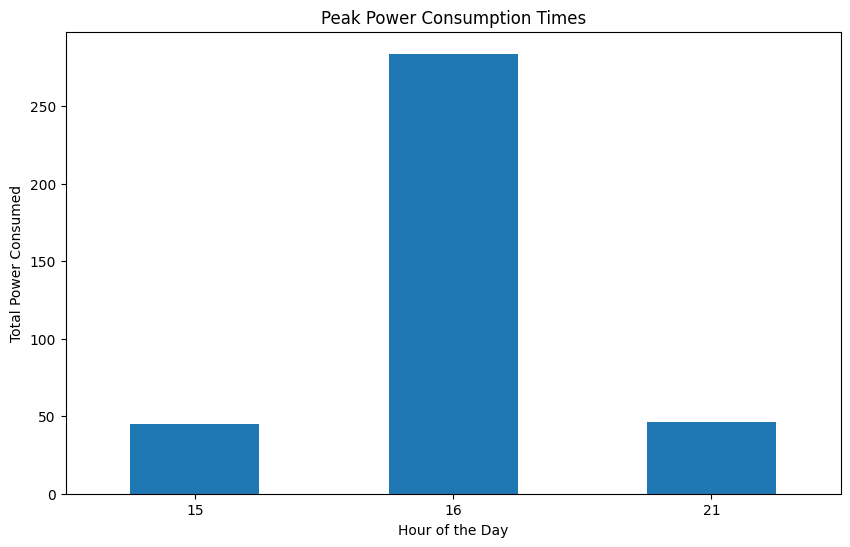

In [17]:
#7 Peak Power Consumption Times
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
peak_power_times = df.groupby('Hour')['powerConsumed'].sum()
plt.figure(figsize=(10, 6))
peak_power_times.plot(kind='bar')
plt.title('Peak Power Consumption Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Power Consumed')
plt.xticks(rotation=0)
plt.show()

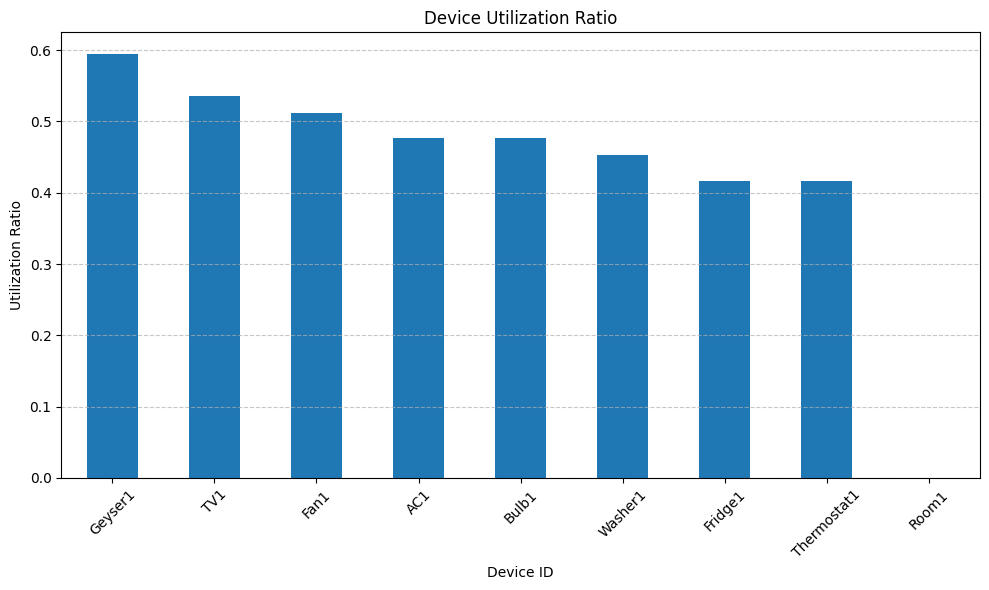

In [19]:
#8 Analytical Question 2: Device Utilization Ratio
device_utilization = df.groupby('ID (must be unique)')['onOff'].mean()
device_utilization.sort_values(ascending=False, inplace=True)
# Plotting
plt.figure(figsize=(10, 6))
device_utilization.plot(kind='bar')
plt.title('Device Utilization Ratio')
plt.xlabel('Device ID')
plt.ylabel('Utilization Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

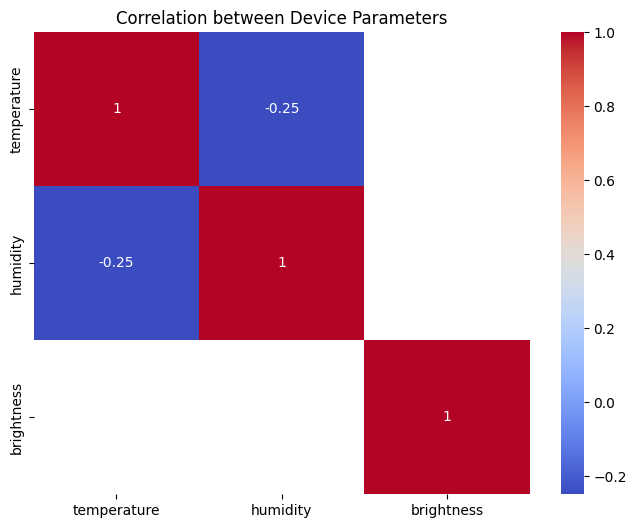

In [24]:

#9 Correlation between Device Parameters
device_parameters = ['temperature', 'humidity', 'brightness']
device_corr = df[device_parameters].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(device_corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Device Parameters')
plt.show()

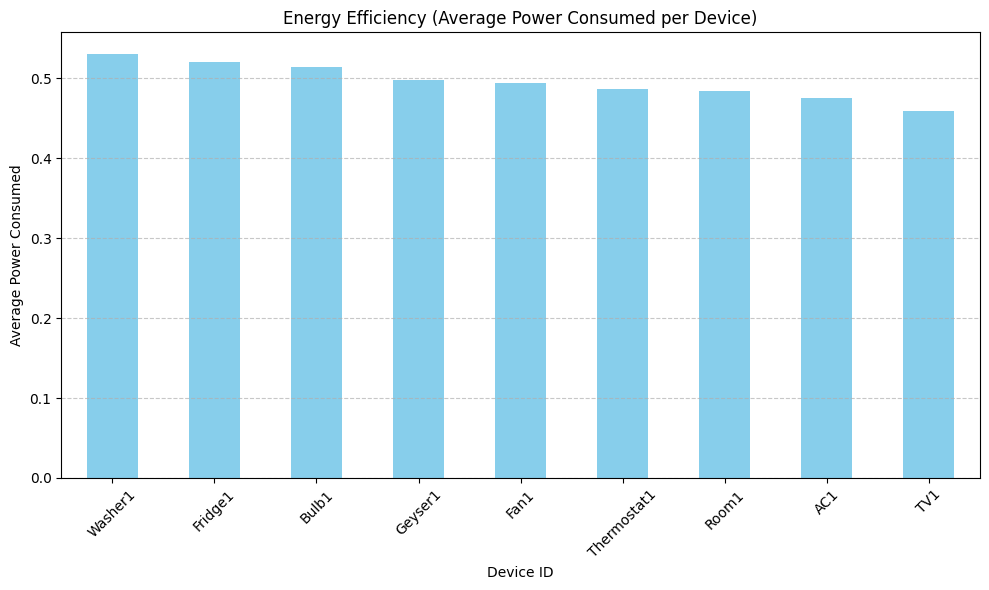

In [28]:
#10 Energy Efficiency Analysis
energy_efficiency = df.groupby('ID (must be unique)')['powerConsumed'].mean()
energy_efficiency.sort_values(ascending=False, inplace=True)

# Plotting energy efficiency
plt.figure(figsize=(10, 6))
energy_efficiency.plot(kind='bar', color='skyblue')
plt.title('Energy Efficiency (Average Power Consumed per Device)')
plt.xlabel('Device ID')
plt.ylabel('Average Power Consumed')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


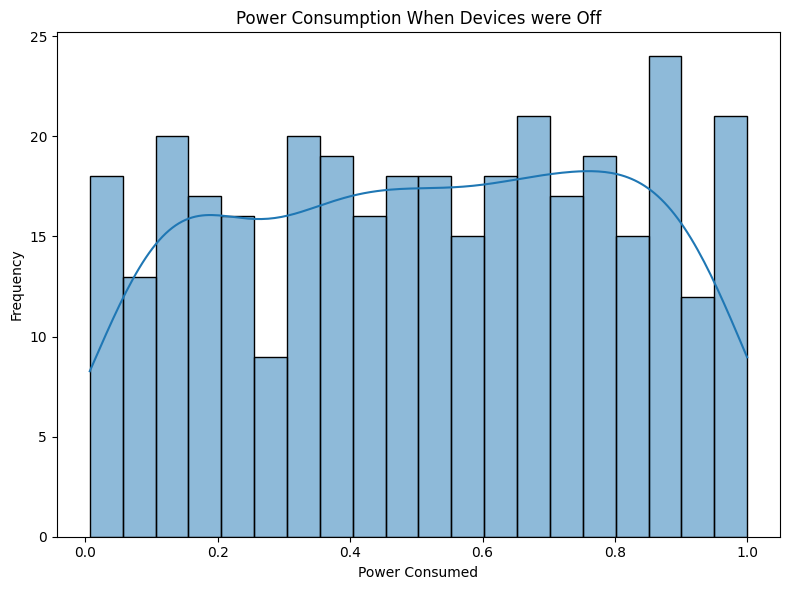

In [9]:
#11. Graph for power consumed when devices were Off
off_devices = df[df['onOff'] == False]
plt.figure(figsize=(8, 6))
sns.histplot(x='powerConsumed', data=off_devices, bins=20, kde=True)
plt.title('Power Consumption When Devices were Off')
plt.xlabel('Power Consumed')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

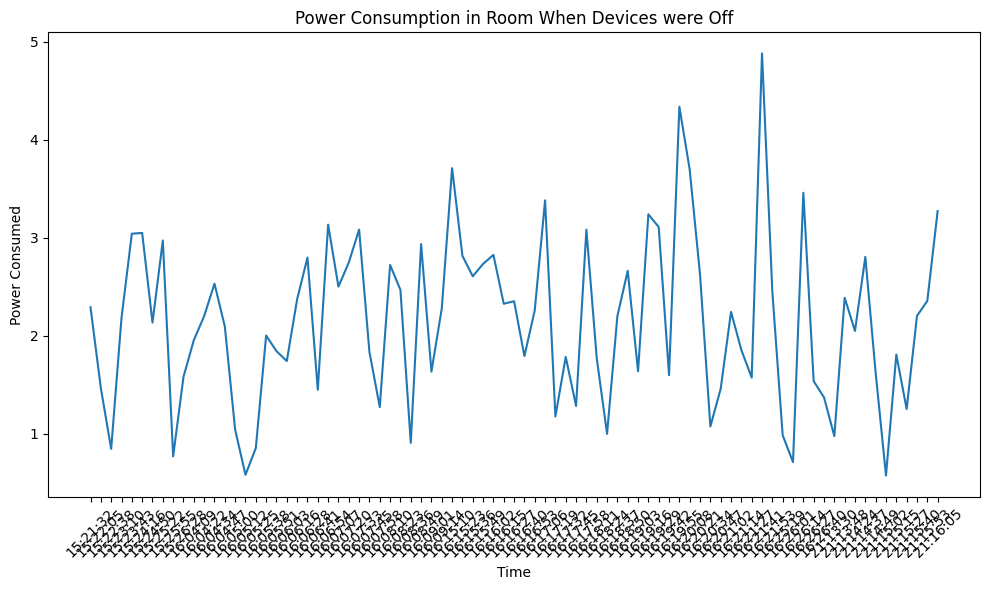

In [10]:
#12. Graph for power consumed in Room when devices were Off
room_power_off = off_devices.groupby(['Date', 'Time'])['powerConsumed'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time', y='powerConsumed', data=room_power_off)
plt.title('Power Consumption in Room When Devices were Off')
plt.xlabel('Time')
plt.ylabel('Power Consumed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
#13. Custom query for power. Power consumed > 0.75
custom_query = df[df['powerConsumed'] > 0.75]
print("Custom Query Results:")
print(custom_query)

Custom Query Results:
                      ModelID ID (must be unique) Relationship (From)  \
5       dtmi:example:Fridge;1             Fridge1               Room1   
6    dtmi:example:LightBulb;1               Bulb1               Room1   
10          dtmi:example:AC;1                 AC1               Room1   
13      dtmi:example:Geyser;1             Geyser1               Room1   
24   dtmi:example:LightBulb;1               Bulb1               Room1   
..                        ...                 ...                 ...   
634     dtmi:example:Geyser;1             Geyser1               Room1   
639       dtmi:example:Room;1               Room1                 NaN   
643     dtmi:example:Geyser;1             Geyser1               Room1   
644     dtmi:example:Fridge;1             Fridge1               Room1   
654  dtmi:example:LightBulb;1               Bulb1               Room1   

    Relationship Name                                          Init Data  \
5           containsF  {"

In [33]:
%pip install pandas statsmodels

Note: you may need to restart the kernel to use updated packages.


In [11]:
# Step 4: Extract 'powerConsumed' values from 'Init Data' column
def extract_power_consumed(init_data):
    try:
        init_data_dict = json.loads(init_data)
        return init_data_dict.get('powerConsumed', np.nan)
    except json.JSONDecodeError:
        return np.nan
def extract_onOff(init_data):
    try:
        init_data_dict = json.loads(init_data)
        return init_data_dict.get('onOff', np.nan)
    except json.JSONDecodeError:
        return np.nan
# Load the Excel file into a DataFrame
df = pd.read_excel('./assests/datadump.xlsx')
df['powerConsumed'] = df['Init Data'].apply(extract_power_consumed)
df['onOff'] = df['Init Data'].apply(extract_onOff)


In [12]:
import pandas as pd
import json


# Extract data for the AC device
ac_df = df[df['ModelID'] == 'dtmi:example:Room;1'].copy()

# Parse 'Init Data' column to extract 'powerConsumed' values
ac_df['powerConsumed'] = ac_df['Init Data'].apply(lambda x: json.loads(x)['powerConsumed'])

# Create a new DataFrame with index and 'powerConsumed' values for AC
ac_power_df = pd.DataFrame(ac_df['powerConsumed'].values, columns=['AC_Power_Consumption'])

# Set the index starting from 1
ac_power_df.index = ac_power_df.index + 1

# Display the new DataFrame
print(ac_power_df)


    AC_Power_Consumption
1               0.564509
2               0.702362
3               0.612073
4               0.561277
5               0.510486
..                   ...
80              0.112597
81              0.659175
82              0.400602
83              0.370753
84              0.633490

[84 rows x 1 columns]


C:\Users\MAHE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


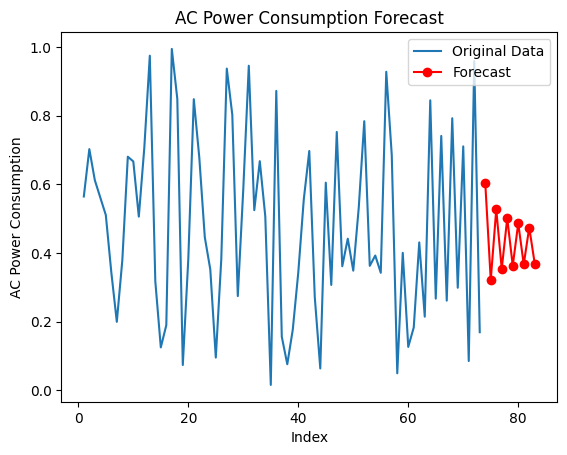

In [80]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Define the ARIMA model
model = ARIMA(ac_power_df['AC_Power_Consumption'], order=(2, 2, 2))  # Example order, you can adjust parameters as needed

# Fit the ARIMA model
model_fit = model.fit()

# Forecast next 10 values
forecast = model_fit.forecast(steps=10)

# Plot original data and forecast
plt.plot(ac_power_df.index, ac_power_df['AC_Power_Consumption'], label='Original Data')
plt.plot(np.arange(ac_power_df.index[-1] + 1, ac_power_df.index[-1] + 11), forecast, marker='o', color='red', label='Forecast')
plt.xlabel('Index')
plt.ylabel('AC Power Consumption')
plt.title('AC Power Consumption Forecast')
plt.legend()
plt.show()


C:\Users\MAHE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


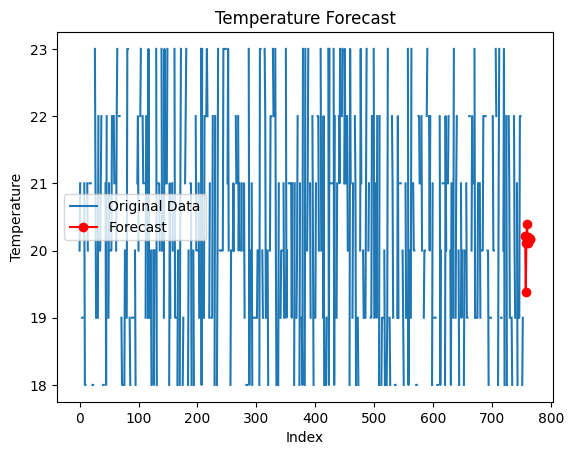

In [30]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Define the ARIMA model
model = ARIMA(df['temperature'], order=(2, 2, 2))  # Example order, adjust parameters as needed

# Fit the ARIMA model
model_fit = model.fit()

# Forecast next 10 values
forecast = model_fit.forecast(steps=10)

# Plot original data and forecast
plt.plot(df.index, df['temperature'], label='Original Data')
plt.plot(np.arange(df.index[-1] + 1, df.index[-1] + 11), forecast, marker='o', color='red', label='Forecast')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Temperature Forecast')
plt.legend()
plt.show()


C:\Users\MAHE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


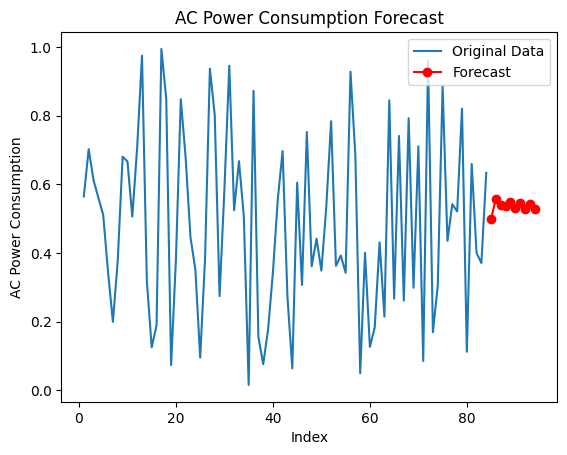

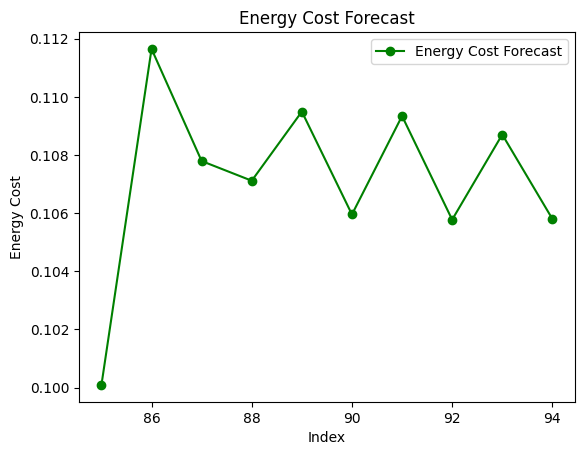

In [32]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Define the ARIMA model
model = ARIMA(ac_power_df['AC_Power_Consumption'], order=(2, 2, 2))  # Example order, you can adjust parameters as needed

# Fit the ARIMA model
model_fit = model.fit()

# Forecast next 10 values
forecast = model_fit.forecast(steps=10)

# Assuming energy cost is directly proportional to power consumption
# You can adjust this calculation based on your energy cost model
energy_cost_forecast = forecast * 0.2  # Example energy cost rate ($0.2 per unit of power consumption)

# Plot original data and forecast
plt.plot(ac_power_df.index, ac_power_df['AC_Power_Consumption'], label='Original Data')
plt.plot(np.arange(ac_power_df.index[-1] + 1, ac_power_df.index[-1] + 11), forecast, marker='o', color='red', label='Forecast')
plt.xlabel('Index')
plt.ylabel('AC Power Consumption')
plt.title('AC Power Consumption Forecast')
plt.legend()
plt.show()

# Plot energy cost forecast
plt.plot(np.arange(ac_power_df.index[-1] + 1, ac_power_df.index[-1] + 11), energy_cost_forecast, marker='o', color='green', label='Energy Cost Forecast')
plt.xlabel('Index')
plt.ylabel('Energy Cost')
plt.title('Energy Cost Forecast')
plt.legend()
plt.show()


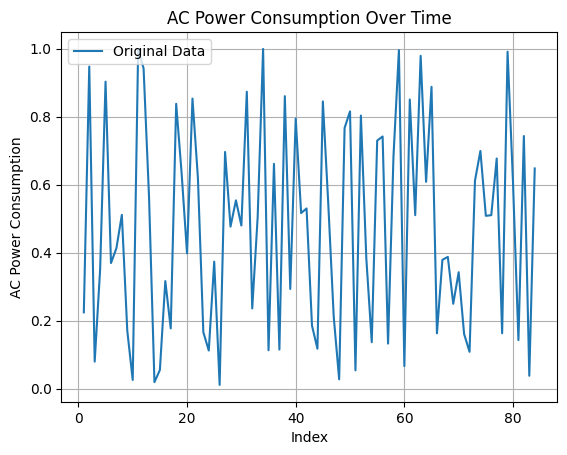

KeyboardInterrupt: 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import json

def plot_ac_power_consumption(file_path):
    while True:
        # Load the Excel data
        df = pd.read_excel(file_path)
        
        # Extract data for the AC device
        ac_df = df[df['ModelID'] == 'dtmi:example:AC;1'].copy()
        
        # Parse 'Init Data' column to extract 'powerConsumed' values
        ac_df['powerConsumed'] = ac_df['Init Data'].apply(lambda x: json.loads(x)['powerConsumed'])
        
        # Create a new DataFrame with index and 'powerConsumed' values for AC
        ac_power_df = pd.DataFrame(ac_df['powerConsumed'].values, columns=['AC_Power_Consumption'])
        
        # Set the index starting from 1
        ac_power_df.index = ac_power_df.index + 1
        
        # Close the current figure
        plt.close()
        
        # Plot the new graph
        plt.plot(ac_power_df.index, ac_power_df['AC_Power_Consumption'], label='Original Data')
        plt.xlabel('Index')
        plt.ylabel('AC Power Consumption')
        plt.title('AC Power Consumption Over Time')
        plt.grid(True)
        plt.legend()
        plt.show()
        
        # Wait for 10 seconds before loading the Excel data again
        time.sleep(10)

# Example usage:
plot_ac_power_consumption('./assests/datadump.xlsx')


In [5]:
%pip install dash

   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.2 MB 10.6 MB/s eta 0:00:01
   ----- ---------------------------------- 1.3/10.2 MB 17.1 MB/s eta 0:00:01
   -------- ------------------------------- 2.2/10.2 MB 20.4 MB/s eta 0:00:01
   --------- ------------------------------ 2.3/10.2 MB 14.7 MB/s eta 0:00:01
   --------- ------------------------------ 2.4/10.2 MB 11.9 MB/s eta 0:00:01
   ----------- ---------------------------- 2.9/10.2 MB 11.7 MB/s eta 0:00:01
   ----------------- ---------------------- 4.4/10.2 MB 14.9 MB/s eta 0:00:01
   --------------------- ------------------ 5.5/10.2 MB 15.8 MB/s eta 0:00:01
   ------------------------- -------------- 6.5/10.2 MB 16.6 MB/s eta 0:00:01
   -------------------------------- ------- 8.2/10.2 MB 18.7 MB/s eta 0:00:01
   ----------------------------------- ---- 9.2/10.2 MB 19.0 MB/s eta 0:00:01
   ---------------------------------------  10.2/10.2 MB 20.4 MB/s eta 0

In [12]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import json
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go

# Load the Excel file into a DataFrame
df = pd.read_excel('./assests/datadump.xlsx')

# Define app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div([
    html.H1("Analytics Dashboard"),
    
    # Metric: Total power consumed in Room
    html.Div([
        html.H3("Total power consumed in Room:"),
        html.Div(id='total_power_consumed_room')
    ]),
    
    # Metric: Total power consumed per device
    html.Div([
        html.H3("Total power consumed per device:"),
        html.Div(id='total_power_per_device')
    ]),
    
    # Metric: Average power consumed in Room
    html.Div([
        html.H3("Average power consumed in Room:"),
        html.Div(id='average_power_room')
    ]),
    
    # Metric: Average power consumed per device
    html.Div([
        html.H3("Average power consumed per device:"),
        html.Div(id='average_power_per_device')
    ]),
    
    # Graph: Trends of Power Consumption Across Devices
    html.Div([
        html.H3("Trends of Power Consumption Across Devices:"),
        dcc.Graph(id='power_consumption_trends')
    ]),
    
    # Graph: Power Consumption Outliers
    html.Div([
        html.H3("Power Consumption Outliers:"),
        dcc.Graph(id='power_consumption_outliers')
    ]),
    
    # Graph: Peak Power Consumption Times
    html.Div([
        html.H3("Peak Power Consumption Times:"),
        dcc.Graph(id='peak_power_times')
    ]),
    
    # Graph: Device Utilization Ratio
    html.Div([
        html.H3("Device Utilization Ratio:"),
        dcc.Graph(id='device_utilization_ratio')
    ]),
    
    # Graph: Correlation between Device Parameters
    html.Div([
        html.H3("Correlation between Device Parameters:"),
        dcc.Graph(id='device_parameters_correlation')
    ]),
    
    # Graph: Energy Efficiency Analysis
    html.Div([
        html.H3("Energy Efficiency Analysis:"),
        dcc.Graph(id='energy_efficiency_analysis')
    ]),
    
    # Graph: Power Consumption When Devices were Off
    html.Div([
        html.H3("Power Consumption When Devices were Off:"),
        dcc.Graph(id='power_consumption_when_off')
    ]),
    
    # Graph: Power Consumption in Room When Devices were Off
    html.Div([
        html.H3("Power Consumption in Room When Devices were Off:"),
        dcc.Graph(id='power_consumption_room_when_off')
    ]),

    # Interval component to trigger updates
    dcc.Interval(
        id='interval-component',
        interval=10000,  # in milliseconds (10 seconds)
        n_intervals=0
    )
])

# Define callbacks to update dashboard components
@app.callback(
    Output('total_power_consumed_room', 'children'),
    Output('total_power_per_device', 'children'),
    Output('average_power_room', 'children'),
    Output('average_power_per_device', 'children'),
    Output('power_consumption_trends', 'figure'),
    Output('power_consumption_outliers', 'figure'),
    Output('peak_power_times', 'figure'),
    Output('device_utilization_ratio', 'figure'),
    Output('device_parameters_correlation', 'figure'),
    Output('energy_efficiency_analysis', 'figure'),
    Output('power_consumption_when_off', 'figure'),
    Output('power_consumption_room_when_off', 'figure'),
    Input('interval-component', 'n_intervals')
)
def update_metrics_and_graphs(n):
    # Step 4: Extract 'powerConsumed' values from 'Init Data' column
    def extract_power_consumed(init_data):
        try:
            init_data_dict = json.loads(init_data)
            return init_data_dict.get('powerConsumed', np.nan)
        except json.JSONDecodeError:
            return np.nan
    
    def extract_onOff(init_data):
        try:
            init_data_dict = json.loads(init_data)
            return init_data_dict.get('onOff', np.nan)
        except json.JSONDecodeError:
            return np.nan
    
    def extract_humidity(init_data):
        try:
            init_data_dict = json.loads(init_data)
            return init_data_dict.get('humidity', np.nan)
        except json.JSONDecodeError:
            return np.nan
    
    def extract_temperature(init_data):
        try:
            init_data_dict = json.loads(init_data)
            return init_data_dict.get('temperature', np.nan)
        except json.JSONDecodeError:
            return np.nan
    
    def extract_brightness(init_data):
        try:
            init_data_dict = json.loads(init_data)
            return init_data_dict.get('brightness', np.nan)
        except json.JSONDecodeError:
            return np.nan
    
    df['powerConsumed'] = df['Init Data'].apply(extract_power_consumed)
    df['onOff'] = df['Init Data'].apply(extract_onOff)
    df['humidity'] = df['Init Data'].apply(extract_humidity)
    df['temperature'] = df['Init Data'].apply(extract_temperature)
    df['brightness'] = df['Init Data'].apply(extract_brightness)
    
    # Metric: Total power consumed in Room
    total_power_room = df['powerConsumed'].sum()
    
    # Metric: Total power consumed per device
    total_power_per_device = df.groupby('ModelID')['powerConsumed'].sum().to_dict()
    
    # Metric: Average power consumed in Room
    average_power_room = df['powerConsumed'].mean()
    
    # Metric: Average power consumed per device
    average_power_per_device = df.groupby('ModelID')['powerConsumed'].mean().to_dict()
    
    # Graph: Trends of Power Consumption Across Devices
    fig_power_consumption_trends = px.line(df, x='Time', y='powerConsumed', color='ModelID', title='Trends of Power Consumption Across Devices')
    
    # Graph: Power Consumption Outliers
    fig_power_consumption_outliers = px.box(df, y='powerConsumed', title='Power Consumption Outliers')
    
    # Graph: Peak Power Consumption Times
    df['Time'] = pd.to_datetime(df['Time'])
    df['Hour'] = df['Time'].dt.hour
    peak_power_times = df.groupby('Hour')['powerConsumed'].sum().reset_index()
    fig_peak_power_times = px.bar(peak_power_times, x='Hour', y='powerConsumed', title='Peak Power Consumption Times')
    
    # Graph: Device Utilization Ratio
    device_utilization = df.groupby('ID (must be unique)')['onOff'].mean().sort_values(ascending=False)
    fig_device_utilization_ratio = px.bar(device_utilization, title='Device Utilization Ratio')
    
    # Graph: Correlation between Device Parameters
    device_parameters = ['temperature', 'humidity', 'brightness']
    device_corr = df[device_parameters].corr()
    fig_device_parameters_correlation = px.imshow(device_corr, title='Correlation between Device Parameters')
    
    # Graph: Energy Efficiency Analysis
    energy_efficiency = df.groupby('ID (must be unique)')['powerConsumed'].mean().sort_values(ascending=False)
    fig_energy_efficiency_analysis = px.bar(energy_efficiency, title='Energy Efficiency Analysis')
    
    # Graph: Power Consumption When Devices were Off
    off_devices = df[df['onOff'] == False]
    fig_power_consumption_when_off = px.histogram(off_devices, x='powerConsumed', title='Power Consumption When Devices were Off')
    
    # Graph: Power Consumption in Room When Devices were Off
    room_power_off = off_devices.groupby(['Date', 'Time'])['powerConsumed'].sum().reset_index()
    fig_power_consumption_room_when_off = px.line(room_power_off, x='Time', y='powerConsumed', title='Power Consumption in Room When Devices were Off')
    
    return (
        total_power_room,
        json.dumps(total_power_per_device, indent=4),
        average_power_room,
        json.dumps(average_power_per_device, indent=4),
        fig_power_consumption_trends,
        fig_power_consumption_outliers,
        fig_peak_power_times,
        fig_device_utilization_ratio,
        fig_device_parameters_correlation,
        fig_energy_efficiency_analysis,
        fig_power_consumption_when_off,
        fig_power_consumption_room_when_off
    )

if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\MAHE\AppData\Local\Temp\ipykernel_2648\3779671740.py:182: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

